<a href="https://colab.research.google.com/github/Ronak1801/HARRIS_corner_detection/blob/master/MiniProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dog = 1 and Cat = 0

#DOWNLOADING THE DATASET

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2021-08-19 10:46:49--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.53.252.195, 2600:1406:3f:384::e59, 2600:1406:3f:3a0::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.53.252.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip.1’

kagglecatsanddogs_3 100%[===================>] 786.68M  35.5MB/s    in 8.2s    

2021-08-19 10:46:58 (96.4 MB/s) - ‘kagglecatsanddogs_3367a.zip.1’ saved [824894548/824894548]



In [ ]:
!unzip kagglecatsanddogs_3367a.zip

Archive:  kagglecatsanddogs_3367a.zip
replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: o
error:  invalid response [o]
replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace PetImages/Cat/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace PetImages/Cat/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# IMPORT MODULES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

# CREATE DATAFRAME FOR INPUT AND OUTPUT

In [ ]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name == 'Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages",class_name, path))
print(input_path[0], label[0])  


PetImages/Dog/4488.jpg 1


In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop = True) ##shuffing the dataframe
df.head()

images  label
0  PetImages/Dog/9669.jpg      1
1  PetImages/Cat/8105.jpg      0
2  PetImages/Cat/8011.jpg      0
3   PetImages/Dog/324.jpg      1
4  PetImages/Dog/9874.jpg      1

In [ ]:
## seeing the unwanted files in the dataset
for i in df['images']:
  if '.jpg' not in i:
    print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [ ]:
import PIL
l = []
for image in df['images']:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Dog/Thumbs.db',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Cat/666.jpg',
 'PetImages/Dog/11702.jpg']

In [ ]:
#delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

EXPLORATORY DATA ANALYSIS

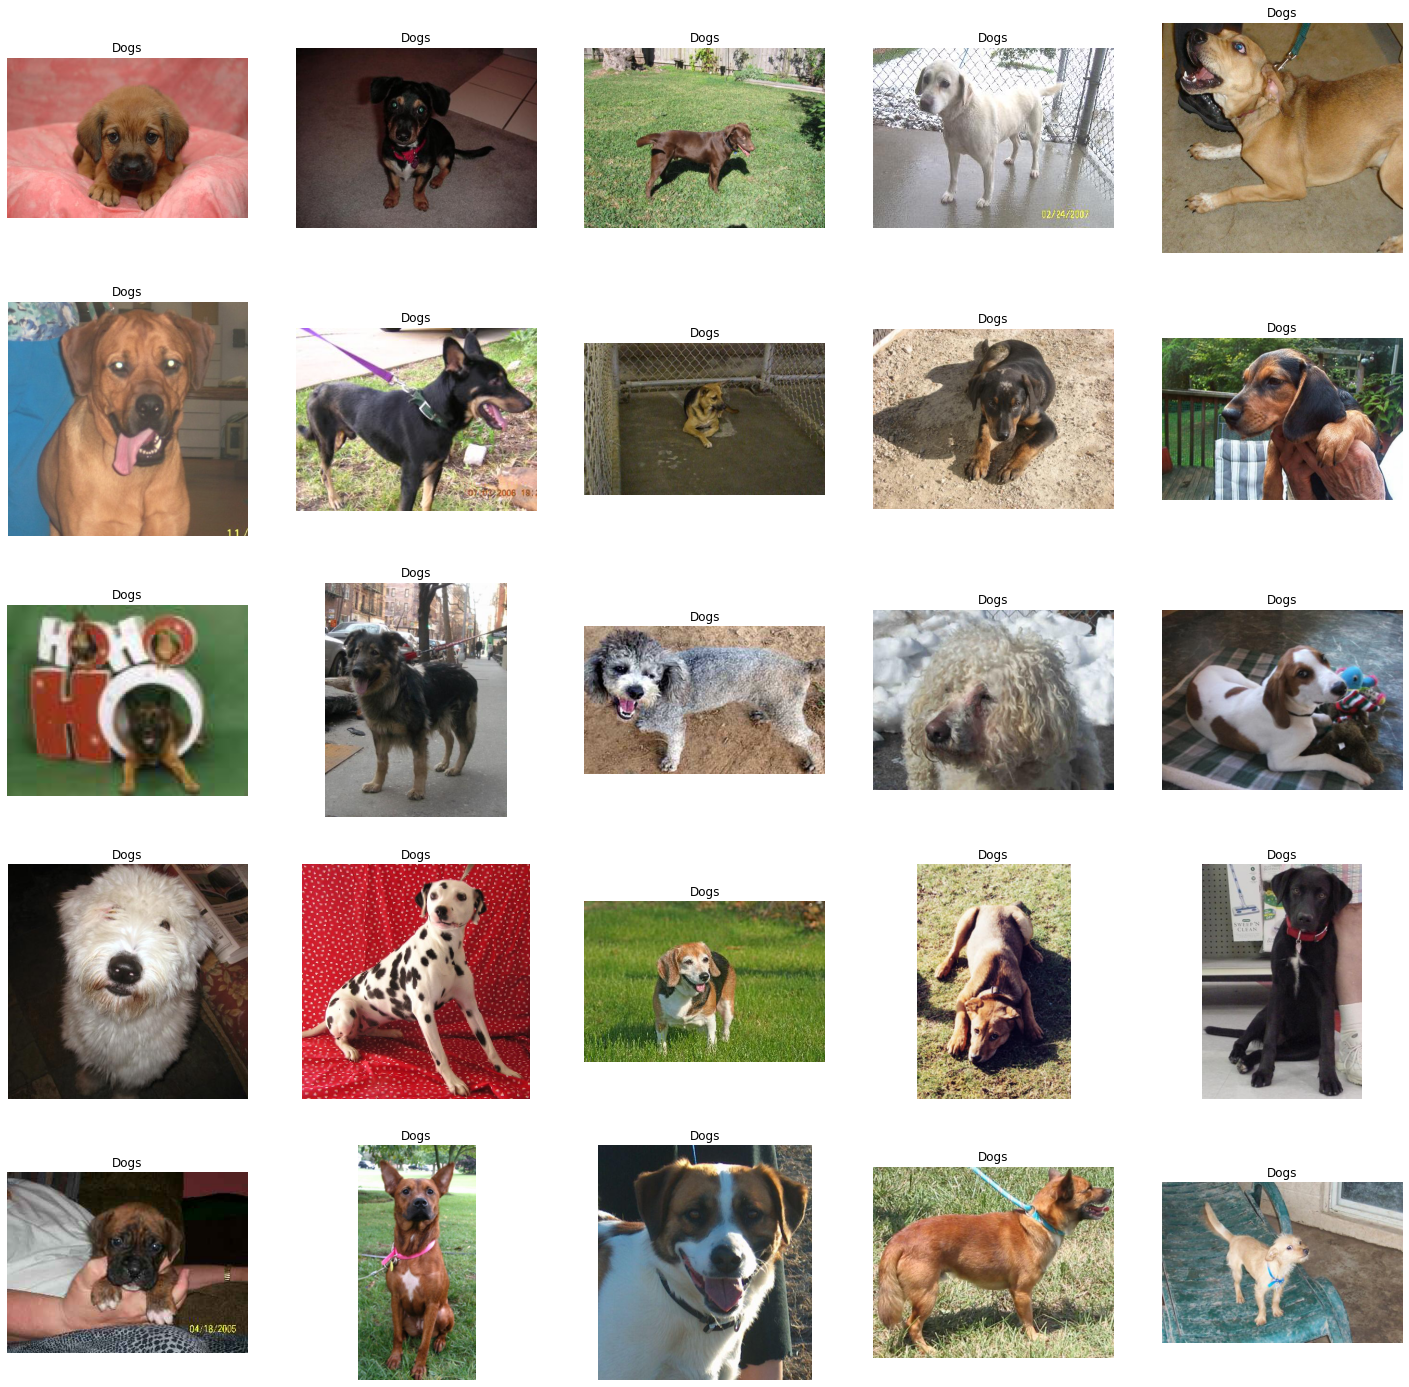

In [ ]:
##display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label'] == 1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')



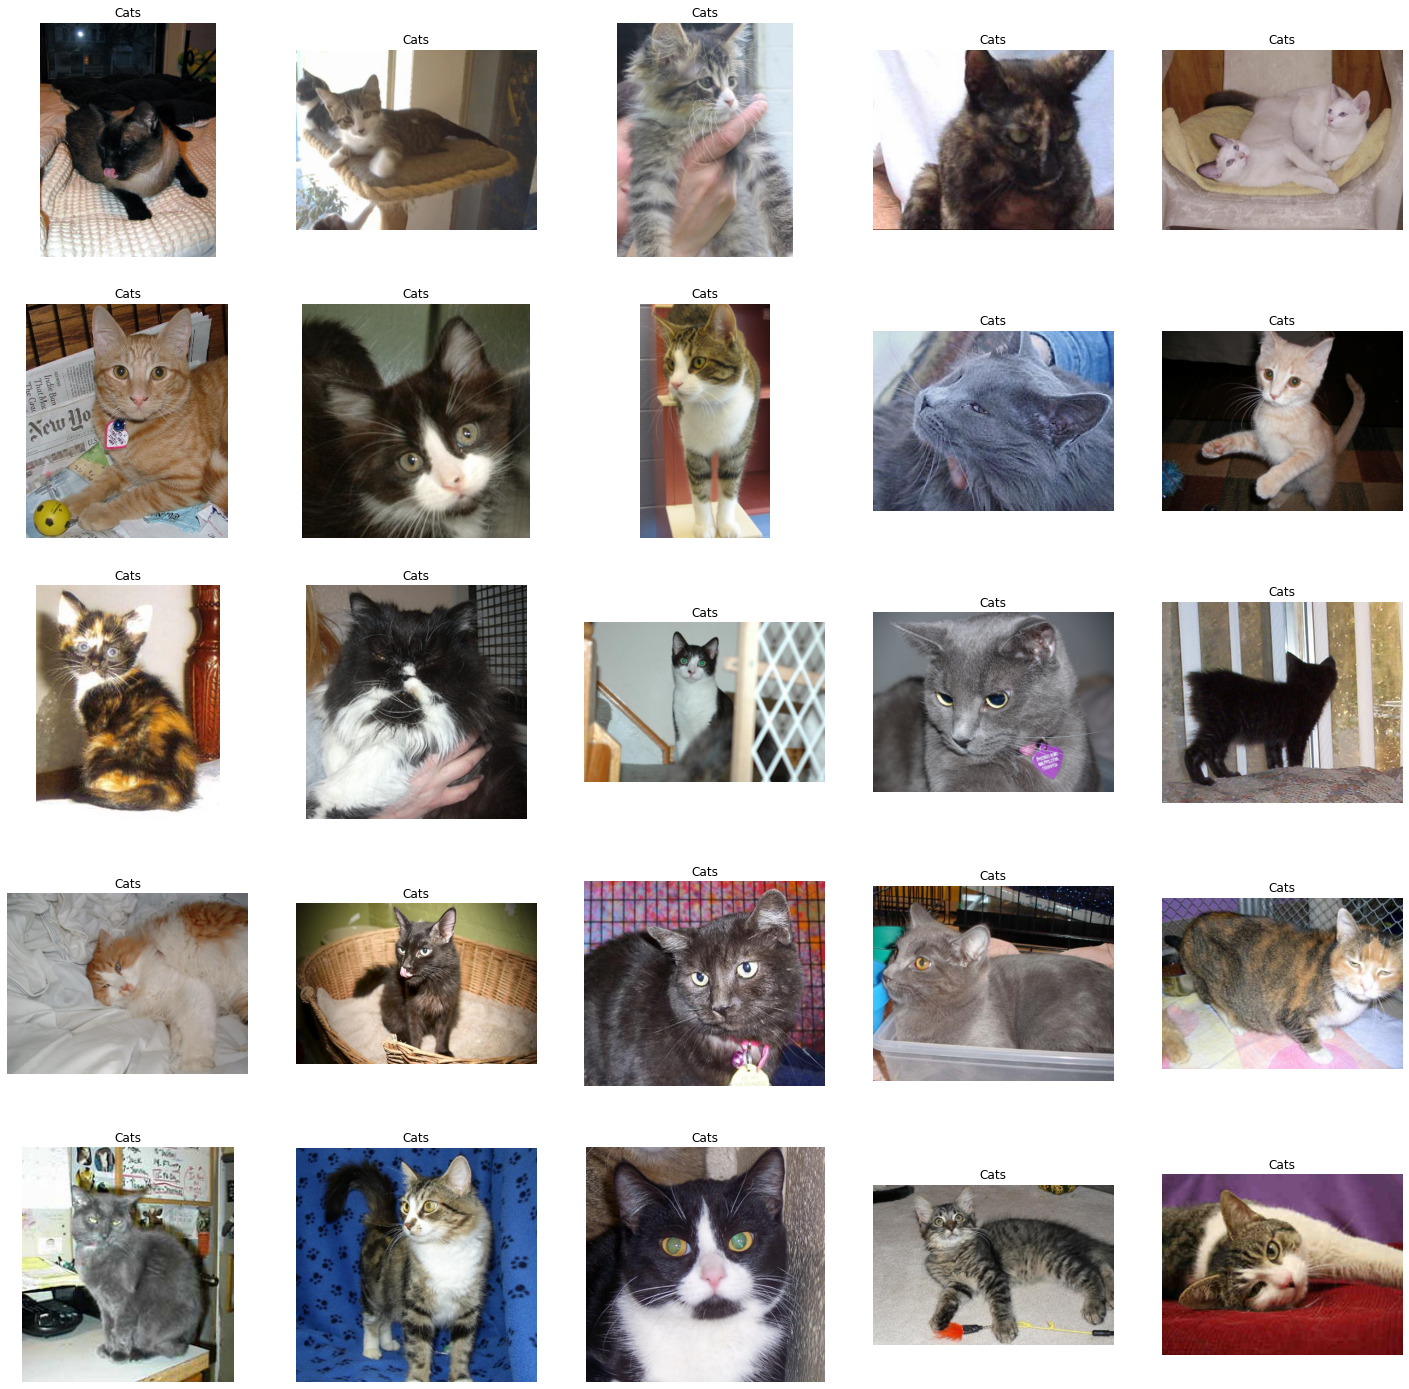

In [ ]:
##dispaly grid of images
plt.figure(figsize=(25,25))
temp = df[df['label'] == 0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')



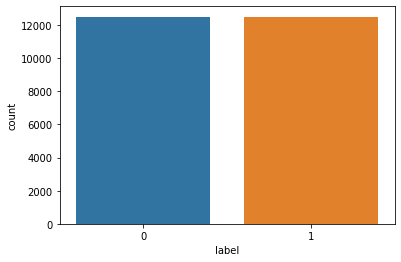

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

CREATE DATA GENERATOR For THE IMAGES

In [ ]:
df['label'] = df['label'].astype('str')

In [ ]:
df.head()

images label
0  PetImages/Dog/9669.jpg     1
1  PetImages/Cat/8105.jpg     0
2  PetImages/Cat/8011.jpg     0
3   PetImages/Dog/324.jpg     1
4  PetImages/Dog/9874.jpg     1

In [ ]:
#input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255, ##normalization of images
    rotation_range = 40,   ##augmentation of m=image to avoid overfitting
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale=1./255)

train_iterator = train_generator.flow_from_dataframe(
    df, 
    x_col = 'images', 
    y_col = 'label', 
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    df, 
    x_col = 'images', 
    y_col = 'label', 
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 24998 validated image filenames belonging to 2 classes.
Found 24998 validated image filenames belonging to 2 classes.


MODEL CREATION

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                  Conv2D(16, (3,3), activation = 'relu', input_shape=(128,128,3)),
                  MaxPool2D((2,2)),
                  Conv2D(32, (3,3), activation='relu'),
                  MaxPool2D((2,2)),
                  Conv2D(64, (3,3), activation='relu'),
                  MaxPool2D((2,2)),
                  Flatten(),
                  Dense(512, activation='relu'),
                  Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [ ]:
history = model.fit(train_iterator, epochs=5, validation_data=val_iterator)

Epoch 1/5
49/49 [==============================] - 200s 4s/step - loss: 0.4898 - accuracy: 0.7667 - val_loss: 0.4105 - val_accuracy: 0.8137
Epoch 2/5
49/49 [==============================] - 196s 4s/step - loss: 0.4295 - accuracy: 0.7995 - val_loss: 0.3956 - val_accuracy: 0.8179
Epoch 3/5
49/49 [==============================] - 196s 4s/step - loss: 0.4200 - accuracy: 0.8063 - val_loss: 0.3853 - val_accuracy: 0.8253
Epoch 4/5
49/49 [==============================] - 196s 4s/step - loss: 0.4170 - accuracy: 0.8090 - val_loss: 0.3753 - val_accuracy: 0.8316
Epoch 5/5
49/49 [==============================] - 196s 4s/step - loss: 0.4083 - accuracy: 0.8112 - val_loss: 0.3731 - val_accuracy: 0.8329


Visualization of Results

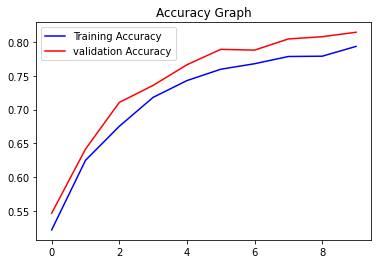

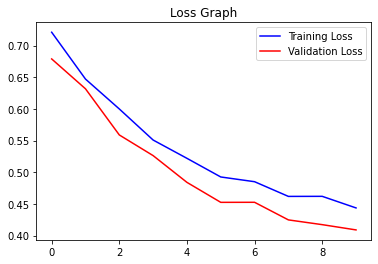

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label= 'validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()